In [1]:
#Python dependencies
import pandas as pd
from sqlalchemy import create_engine
from password import SQLPassword as password
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Extraction

In [2]:
#Data Extraction from Raw Data folder
obesity = pd.read_csv("Resources/Raw Data/obesity-cleaned.csv")
world_happiness = pd.read_csv("Resources/Raw Data/world-happiness-report.csv")

In [3]:
#Checking Data Extraction for obesity
obesity.head()

,Unnamed: 0,Country,Year,Obesity (%),Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,4,Afghanistan,1976,0.2 [0.0-0.7],Male


In [4]:
#Checking Data Extraction for world_happiness
world_happiness.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


# Transformation

In [5]:
#Changing column names to make it easier to work with
obesity=obesity.rename(columns={"Obesity (%)": "Obesity"})
obesity

,Unnamed: 0,Country,Year,Obesity,Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,4,Afghanistan,1976,0.2 [0.0-0.7],Male
...,...,...,...,...,...
24565,24565,Zimbabwe,2015,4.5 [2.4-7.6],Male
24566,24566,Zimbabwe,2015,24.8 [18.9-31.3],Female
24567,24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes
24568,24568,Zimbabwe,2016,4.7 [2.5-8.0],Male


In [6]:
#pulling in specific columns for the dataframe
obesity_df = obesity[['Country', 'Year', 'Obesity', 'Sex']]

#The dataset is cleaned up only to include relevant year>2008 and both sexes data
obesity_df = obesity_df[(obesity_df['Year'] >= 2008)&(obesity_df['Sex']=='Both sexes')].dropna()

#Range was omitted from the mean values in Obesity Column
obesity_df["Obesity"]=[obesity_df.Obesity.str.split(expand=True)][0]

#After loading the data, No was found in the value columns in "Obesity"
obesity_df= obesity_df.loc[obesity_df["Obesity"]!="No"]
obesity_df["Obesity"]=obesity_df["Obesity"].astype(float)

#Checking the Dataframe
obesity_df

,Country,Year,Obesity,Sex
99,Afghanistan,2008,3.6,Both sexes
102,Afghanistan,2009,3.8,Both sexes
105,Afghanistan,2010,4.0,Both sexes
108,Afghanistan,2011,4.2,Both sexes
111,Afghanistan,2012,4.4,Both sexes
...,...,...,...,...
24555,Zimbabwe,2012,14.3,Both sexes
24558,Zimbabwe,2013,14.6,Both sexes
24561,Zimbabwe,2014,14.9,Both sexes
24564,Zimbabwe,2015,15.2,Both sexes


In [7]:
#Renaming specific columns from world happiness dataframe
world_happiness.columns = ['Country', 'Year', 'Life_Ladder','Log_GDP_Per_Capita','Social_Support',\
                           'Healthy_Life_Expectancy_at_Birth','Freedom_to_Make_Life_Choices', 'Generosity',\
                           'Perceptions_of_Corruptions','Positive_Affect','Negative_Affect']

#Pulling specific columns into a new dataframe and filling blanks
world_happiness_df = world_happiness[['Country', 'Year', 'Life_Ladder','Log_GDP_Per_Capita','Social_Support',\
                           'Healthy_Life_Expectancy_at_Birth','Freedom_to_Make_Life_Choices', 'Generosity',\
                           'Perceptions_of_Corruptions','Positive_Affect','Negative_Affect']].copy().dropna()

#Checking new dataframe
world_happiness_df

,Country,Year,Life_Ladder,Log_GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy_at_Birth,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruptions,Positive_Affect,Negative_Affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [8]:
#After working with the data, same countries were named differently according to the datasets, countries from happiness
hapcountries=list(set(world_happiness_df['Country'])-set(obesity_df['Country']))
hapcountries.sort()
hapcountries

['Bolivia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Czech Republic',
 'Iran',
 'Ivory Coast',
 'Laos',
 'Moldova',
 'North Macedonia',
 'Palestinian Territories',
 'Russia',
 'South Korea',
 'Sudan',
 'Swaziland',
 'Syria',
 'Taiwan Province of China',
 'Tanzania',
 'United Kingdom',
 'United States',
 'Venezuela',
 'Vietnam']

In [9]:
#After working with the data, same countries were named differently according to the datasets, countries from obesity
obesecountries=list(set(obesity_df['Country'])-set(world_happiness_df['Country']))
obesecountries.sort()
obesecountries

['Andorra',
 'Antigua and Barbuda',
 'Bahamas',
 'Barbados',
 'Bolivia (Plurinational State of)',
 'Brunei Darussalam',
 'Cabo Verde',
 'China',
 'Congo',
 'Cook Islands',
 'Cuba',
 'Czechia',
 "Côte d'Ivoire",
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Dominica',
 'Equatorial Guinea',
 'Eritrea',
 'Eswatini',
 'Fiji',
 'Grenada',
 'Guinea-Bissau',
 'Iran (Islamic Republic of)',
 'Kiribati',
 "Lao People's Democratic Republic",
 'Maldives',
 'Marshall Islands',
 'Micronesia (Federated States of)',
 'Nauru',
 'Niue',
 'Oman',
 'Palau',
 'Papua New Guinea',
 'Republic of Korea',
 'Republic of Moldova',
 'Republic of North Macedonia',
 'Russian Federation',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Samoa',
 'Sao Tome and Principe',
 'Seychelles',
 'Solomon Islands',
 'Somalia',
 'Sudan (former)',
 'Syrian Arab Republic',
 'Timor-Leste',
 'Tonga',
 'Turkmenistan',
 'Tuvalu',
 'United Kingdom of Great Britain and N

In [10]:
#Combining and renaming countries that are the same (world_happiness_df)
world_happiness_df.loc[(world_happiness_df["Country"]=="Congo (Brazzaville)")|(world_happiness_df["Country"]=="Congo (Kinshasa)"),"Country"]="Congo"
world_happiness_df.loc[(world_happiness_df["Country"]=="Swaziland"),"Country"]="Eswatini"
world_happiness_df.loc[(world_happiness_df["Country"]=="United States"),"Country"]="United States of America"
world_happiness_df.loc[(world_happiness_df["Country"]=="Taiwan Province of China"),"Country"]="China and Taiwan"
world_happiness_df

,Country,Year,Life_Ladder,Log_GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy_at_Birth,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruptions,Positive_Affect,Negative_Affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [11]:
#Combining and renaming countries that are the same (obesity_df)
obesity_df.loc[(obesity_df["Country"]=="Bolivia (Plurinational State of)"),"Country"]="Bolivia"
obesity_df.loc[(obesity_df["Country"]=="Czechia"),"Country"]="Czech Republic"
obesity_df.loc[(obesity_df["Country"]=="Iran (Islamic Republic of)"),"Country"]="Iran"
obesity_df.loc[(obesity_df["Country"]=="Côte d'Ivoire"),"Country"]="Ivory Coast"
obesity_df.loc[(obesity_df["Country"]=="Lao People's Democratic Republic"),"Country"]="Laos"
obesity_df.loc[(obesity_df["Country"]=="Republic of Moldova"),"Country"]="Moldova"
obesity_df.loc[(obesity_df["Country"]=="Republic of North Macedonia"),"Country"]="North Macedonia"
obesity_df.loc[(obesity_df["Country"]=="Russian Federation"),"Country"]="Russia"
obesity_df.loc[(obesity_df["Country"]=="Democratic People's Republic of Korea"),"Country"]="South Korea"
obesity_df.loc[(obesity_df["Country"]=="Democratic Republic of the Congo"),"Country"]="Congo"
obesity_df.loc[(obesity_df["Country"]=="Syrian Arab Republic"),"Country"]="Syria"
obesity_df.loc[(obesity_df["Country"]=="Taiwan Province of China"),"Country"]="Syria"
obesity_df.loc[(obesity_df["Country"]=="United Republic of Tanzania"),"Country"]="Tanzania"
obesity_df.loc[(obesity_df["Country"]=="United Kingdom of Great Britain and Northern Ireland"),"Country"]="United Kingdom"
obesity_df.loc[(obesity_df["Country"]=="Venezuela (Bolivarian Republic of)"),"Country"]="Venezuela"
obesity_df.loc[(obesity_df["Country"]=="Viet Nam"),"Country"]="Vietnam"
obesity_df.loc[(obesity_df["Country"]=="China"),"Country"]="China and Taiwan"
obesity_df.loc[(obesity_df["Country"]=="South Sudan")|(obesity_df["Country"]=="Sudan (former)"),"Country"]="Sudan"

obesity_df

,Country,Year,Obesity,Sex
99,Afghanistan,2008,3.6,Both sexes
102,Afghanistan,2009,3.8,Both sexes
105,Afghanistan,2010,4.0,Both sexes
108,Afghanistan,2011,4.2,Both sexes
111,Afghanistan,2012,4.4,Both sexes
...,...,...,...,...
24555,Zimbabwe,2012,14.3,Both sexes
24558,Zimbabwe,2013,14.6,Both sexes
24561,Zimbabwe,2014,14.9,Both sexes
24564,Zimbabwe,2015,15.2,Both sexes


In [12]:
#Checking Merge
joint_df = pd.merge(obesity_df, world_happiness_df, on = ['Country','Year'])
joint_df.head()

,Country,Year,Obesity,Sex,Life_Ladder,Log_GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy_at_Birth,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruptions,Positive_Affect,Negative_Affect
0,Afghanistan,2008,3.6,Both sexes,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,3.8,Both sexes,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.0,Both sexes,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,4.2,Both sexes,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,4.4,Both sexes,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


# Load (First Create Tables/Column in SQL Check SQL Code in Resources)
# Create Tables only for "obesity" and "worldhappiness" in SQL

In [13]:
#Connecting to SQL
connection_string = f"{password}@localhost:5432/etl_project"
engine = create_engine(f'postgresql://{connection_string}')

#Checking created table names
engine.table_names()

<ipython-input-13-db93dfd29292>:6: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['worldhappiness', 'obesity']

In [14]:
#Replacing Current data on table with new data
obesity_df.to_sql('obesity', con=engine, if_exists='replace')
world_happiness_df.to_sql('worldhappiness', con=engine, if_exists='replace')

In [15]:
#Creating CSV files from the dataframes
world_happiness_df.to_csv("Resources/world_happiness_df.csv")
obesity_df.to_csv("Resources/obesity_df.csv")

# Analysis (After Joins performed in SQL for ETLTable)

In [16]:
#Connecting to SQL again
connection_string = f"{password}localhost:5432/etl_project"
engine = create_engine(f'postgresql://{connection_string}')


In [17]:
#creating a adataframe from the join table in sql
etlanalysis=pd.read_sql('SELECT * FROM etltable',engine)

#Viewing the table from pandas dataframe
etlanalysis

,Country,Year,Obesity,Positive_Affect
0,Afghanistan,2008,3.6,0.518
1,Afghanistan,2009,3.8,0.584
2,Afghanistan,2010,4.0,0.618
3,Afghanistan,2011,4.2,0.611
4,Afghanistan,2012,4.4,0.710
...,...,...,...,...
1079,Zimbabwe,2012,14.3,0.669
1080,Zimbabwe,2013,14.6,0.712
1081,Zimbabwe,2014,14.9,0.725
1082,Zimbabwe,2015,15.2,0.715


In [18]:
#create query results csv file
etlanalysis.to_csv("Resources/query_results.csv",index=False)

In [19]:
#Import csv file from SQL to python for analysis
obhapanalysis = pd.read_csv("Resources/query_results.csv")

#Check dataframe from csv
obhapanalysis

,Country,Year,Obesity,Positive_Affect
0,Afghanistan,2008,3.6,0.518
1,Afghanistan,2009,3.8,0.584
2,Afghanistan,2010,4.0,0.618
3,Afghanistan,2011,4.2,0.611
4,Afghanistan,2012,4.4,0.710
...,...,...,...,...
1079,Zimbabwe,2012,14.3,0.669
1080,Zimbabwe,2013,14.6,0.712
1081,Zimbabwe,2014,14.9,0.725
1082,Zimbabwe,2015,15.2,0.715


The r-value is: 0.09840108771432306


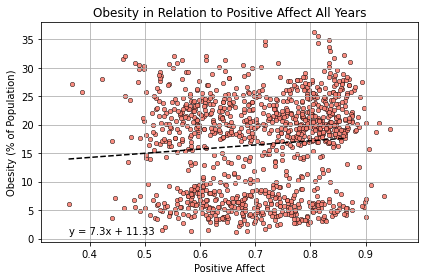

In [20]:
#Plot of all the years

#Plotting scatter using matplotlib
plt.scatter(obhapanalysis["Positive_Affect"], obhapanalysis["Obesity"],edgecolor="black", s=20, c ="salmon", linewidth=0.5, alpha=0.90)
plt.xlabel("Positive Affect")
plt.ylabel("Obesity (% of Population)")
plt.title("Obesity in Relation to Positive Affect All Years")
plt.grid()

#creating the separate parts of a linear regression
slope, inter, r, p, std_err = linregress(obhapanalysis["Positive_Affect"], obhapanalysis["Obesity"])
print(f'The r-value is: {r}')

#creating a range for the linear regression
xrange = np.arange(obhapanalysis["Positive_Affect"].min(),obhapanalysis["Positive_Affect"].max(),.25, dtype="float")


#creating points to graph the linear regression
fit = slope*xrange  + inter
line = "y = " + str(round(slope,2)) + "x + " + str(round(inter,2))

#Plotting the linear regression
plt.plot(xrange,fit,"--", color="black")
plt.annotate(line,(obhapanalysis["Positive_Affect"].min(), obhapanalysis["Positive_Affect"].max()*.8),fontsize=10,color="black")
plt.xlim(obhapanalysis["Positive_Affect"].min()-0.05,obhapanalysis["Positive_Affect"].max()+0.05)
plt.tight_layout()

#Saving figure
plt.savefig("Resources/AllyearsObesityvPositive")

In [21]:
print (obhapanalysis["Year"].astype(int).min())
print (obhapanalysis["Year"].astype(int).max())

2008
2016


In [22]:
#Finding Happiest Countries per Year also exporting each year's data
obhapanalysis2008 = obhapanalysis.loc[obhapanalysis["Year"]==2008]
obhapanalysis2008.to_csv("Resources/obhapanalysis2008.csv")
print (f' Happiest Country is {obhapanalysis2008.loc[obhapanalysis2008["Positive_Affect"]==obhapanalysis2008["Positive_Affect"].max()]["Country"].unique()[0]} in 2008 with a Positive Affect of {obhapanalysis2008["Positive_Affect"].max()}.')

obhapanalysis2009 = obhapanalysis.loc[obhapanalysis["Year"]==2009]
print (f' Happiest Country is {obhapanalysis2009.loc[obhapanalysis2009["Positive_Affect"]==obhapanalysis2009["Positive_Affect"].max()]["Country"].unique()[0]} in 2009 with a Positive Affect of {obhapanalysis2009["Positive_Affect"].max()}.')
obhapanalysis2009.to_csv("Resources/obhapanalysis2009.csv")

obhapanalysis2010 = obhapanalysis.loc[obhapanalysis["Year"]==2010]
print (f' Happiest Country is {obhapanalysis2010.loc[obhapanalysis2010["Positive_Affect"]==obhapanalysis2010["Positive_Affect"].max()]["Country"].unique()[0]} in 2010 with a Positive Affect of {obhapanalysis2010["Positive_Affect"].max()}.')
obhapanalysis2010.to_csv("Resources/obhapanalysis2010.csv")

obhapanalysis2011 = obhapanalysis.loc[obhapanalysis["Year"]==2011]
print (f' Happiest Country is {obhapanalysis2011.loc[obhapanalysis2011["Positive_Affect"]==obhapanalysis2011["Positive_Affect"].max()]["Country"].unique()[0]} in 2011 with a Positive Affect of {obhapanalysis2011["Positive_Affect"].max()}.')
obhapanalysis2011.to_csv("Resources/obhapanalysis2011.csv")

obhapanalysis2012 = obhapanalysis.loc[obhapanalysis["Year"]==2012]
print (f' Happiest Country is {obhapanalysis2012.loc[obhapanalysis2012["Positive_Affect"]==obhapanalysis2012["Positive_Affect"].max()]["Country"].unique()[0]} in 2012 with a Positive Affect of {obhapanalysis2012["Positive_Affect"].max()}.')
obhapanalysis2012.to_csv("Resources/obhapanalysis2012.csv")

obhapanalysis2013 = obhapanalysis.loc[obhapanalysis["Year"]==2013]
print (f' Happiest Country is {obhapanalysis2013.loc[obhapanalysis2013["Positive_Affect"]==obhapanalysis2013["Positive_Affect"].max()]["Country"].unique()[0]} in 2013 with a Positive Affect of {obhapanalysis2013["Positive_Affect"].max()}.')
obhapanalysis2013.to_csv("Resources/obhapanalysis2013.csv")

obhapanalysis2014 = obhapanalysis.loc[obhapanalysis["Year"]==2014]
print (f' Happiest Country is {obhapanalysis2014.loc[obhapanalysis2014["Positive_Affect"]==obhapanalysis2014["Positive_Affect"].max()]["Country"].unique()[0]} in 2014 with a Positive Affect of {obhapanalysis2014["Positive_Affect"].max()}.')
obhapanalysis2014.to_csv("Resources/obhapanalysis2014.csv")

obhapanalysis2015 = obhapanalysis.loc[obhapanalysis["Year"]==2015]
print (f' Happiest Country is {obhapanalysis2015.loc[obhapanalysis2015["Positive_Affect"]==obhapanalysis2015["Positive_Affect"].max()]["Country"].unique()[0]} in 2015 with a Positive Affect of {obhapanalysis2015["Positive_Affect"].max()}.')
obhapanalysis2015.to_csv("Resources/obhapanalysis2015.csv")

obhapanalysis2016 = obhapanalysis.loc[obhapanalysis["Year"]==2016]
print (f' Happiest Country is {obhapanalysis2016.loc[obhapanalysis2016["Positive_Affect"]==obhapanalysis2016["Positive_Affect"].max()]["Country"].unique()[0]} in 2016 with a Positive Affect of {obhapanalysis2016["Positive_Affect"].max()}.')
obhapanalysis2016.to_csv("Resources/obhapanalysis2016.csv")

 Happiest Country is Canada in 2008 with a Positive Affect of 0.89.
 Happiest Country is Thailand in 2009 with a Positive Affect of 0.898.
 Happiest Country is Thailand in 2010 with a Positive Affect of 0.901.
 Happiest Country is Thailand in 2011 with a Positive Affect of 0.934.
 Happiest Country is Iceland in 2012 with a Positive Affect of 0.9.
 Happiest Country is Paraguay in 2013 with a Positive Affect of 0.919.
 Happiest Country is Paraguay in 2014 with a Positive Affect of 0.944.
 Happiest Country is Thailand in 2015 with a Positive Affect of 0.91.
 Happiest Country is Paraguay in 2016 with a Positive Affect of 0.925.


The r-value is: 0.23270348616876574


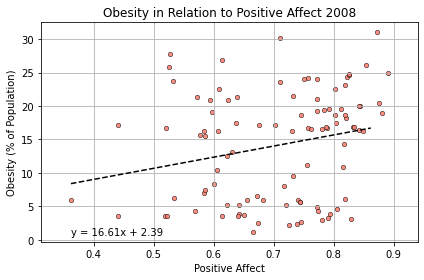

In [23]:
#Plot of year 2008

#Plotting scatter using matplotlib
plt.scatter(obhapanalysis2008["Positive_Affect"], obhapanalysis2008["Obesity"],edgecolor="black", s=20, c ="salmon", linewidth=0.5, alpha=0.90)
plt.xlabel("Positive Affect")
plt.ylabel("Obesity (% of Population)")
plt.title("Obesity in Relation to Positive Affect 2008")
plt.grid()

#creating the separate parts of a linear regression
slope, inter, r, p, std_err = linregress(obhapanalysis2008["Positive_Affect"], obhapanalysis2008["Obesity"])
print(f'The r-value is: {r}')

#creating a range for the linear regression
xrange = np.arange(obhapanalysis2008["Positive_Affect"].min(),obhapanalysis2008["Positive_Affect"].max(),.25, dtype="float")


#creating points to graph the linear regression
fit = slope*xrange  + inter
line = "y = " + str(round(slope,2)) + "x + " + str(round(inter,2))

#Plotting the linear regression
plt.plot(xrange,fit,"--", color="black")
plt.annotate(line,(obhapanalysis2008["Positive_Affect"].min(), obhapanalysis2008["Positive_Affect"].max()*.8),fontsize=10,color="black")
plt.xlim(obhapanalysis2008["Positive_Affect"].min()-0.05,obhapanalysis2008["Positive_Affect"].max()+0.05)
plt.tight_layout()

#Saving figure
plt.savefig("Resources/obhapanalysis2008")


The r-value is: 0.06641084276214207


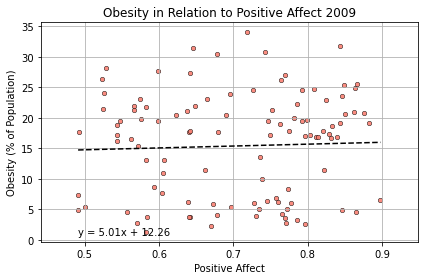

In [24]:
#Plot of year 2009

#Plotting scatter using matplotlib
plt.scatter(obhapanalysis2009["Positive_Affect"], obhapanalysis2009["Obesity"],edgecolor="black", s=20, c ="salmon", linewidth=0.5, alpha=0.90)
plt.xlabel("Positive Affect")
plt.ylabel("Obesity (% of Population)")
plt.title("Obesity in Relation to Positive Affect 2009")
plt.grid()

#creating the separate parts of a linear regression
slope, inter, r, p, std_err = linregress(obhapanalysis2009["Positive_Affect"], obhapanalysis2009["Obesity"])
print(f'The r-value is: {r}')

#creating a range for the linear regression
xrange = np.arange(obhapanalysis2009["Positive_Affect"].min(),obhapanalysis2009["Positive_Affect"].max(),.25, dtype="float")


#creating points to graph the linear regression
fit = slope*xrange  + inter
line = "y = " + str(round(slope,2)) + "x + " + str(round(inter,2))

#Plotting the linear regression
plt.plot((obhapanalysis2009["Positive_Affect"].min(),obhapanalysis2009["Positive_Affect"].max()),fit,"--", color="black")
plt.annotate(line,(obhapanalysis2009["Positive_Affect"].min(), obhapanalysis2009["Positive_Affect"].max()*.8),fontsize=10,color="black")
plt.xlim(obhapanalysis2009["Positive_Affect"].min()-0.05,obhapanalysis2009["Positive_Affect"].max()+0.05)
plt.tight_layout()

#Saving figure
plt.savefig("Resources/obhapanalysis2009")


The r-value is: 0.043395852631088555


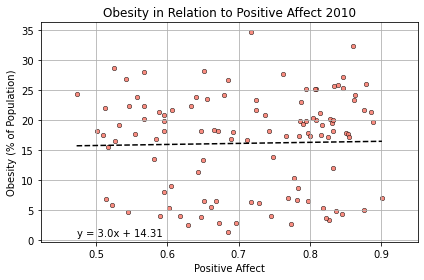

In [25]:
#Plot of year 2010

#Plotting scatter using matplotlib
plt.scatter(obhapanalysis2010["Positive_Affect"], obhapanalysis2010["Obesity"],edgecolor="black", s=20, c ="salmon", linewidth=0.5, alpha=0.90)
plt.xlabel("Positive Affect")
plt.ylabel("Obesity (% of Population)")
plt.title("Obesity in Relation to Positive Affect 2010")
plt.grid()

#creating the separate parts of a linear regression
slope, inter, r, p, std_err = linregress(obhapanalysis2010["Positive_Affect"], obhapanalysis2010["Obesity"])
print(f'The r-value is: {r}')

#creating a range for the linear regression
xrange = np.arange(obhapanalysis2010["Positive_Affect"].min(),obhapanalysis2010["Positive_Affect"].max(),.25, dtype="float")


#creating points to graph the linear regression
fit = slope*xrange  + inter
line = "y = " + str(round(slope,2)) + "x + " + str(round(inter,2))

#Plotting the linear regression
plt.plot((obhapanalysis2010["Positive_Affect"].min(),obhapanalysis2010["Positive_Affect"].max()),fit,"--", color="black")
plt.annotate(line,(obhapanalysis2010["Positive_Affect"].min(), obhapanalysis2010["Positive_Affect"].max()*.8),fontsize=10,color="black")
plt.xlim(obhapanalysis2010["Positive_Affect"].min()-0.05,obhapanalysis2010["Positive_Affect"].max()+0.05)
plt.tight_layout()

#Saving figure
plt.savefig("Resources/obhapanalysis2010")


The r-value is: 0.09481728790551139


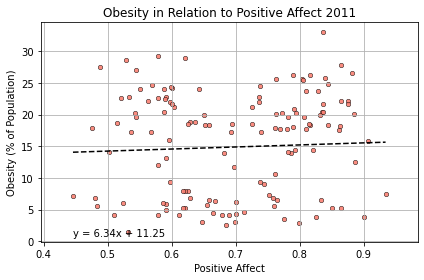

In [26]:
#Plot of year 2011

#Plotting scatter using matplotlib
plt.scatter(obhapanalysis2011["Positive_Affect"], obhapanalysis2011["Obesity"],edgecolor="black", s=20, c ="salmon", linewidth=0.5, alpha=0.90)
plt.xlabel("Positive Affect")
plt.ylabel("Obesity (% of Population)")
plt.title("Obesity in Relation to Positive Affect 2011")
plt.grid()

#creating the separate parts of a linear regression
slope, inter, r, p, std_err = linregress(obhapanalysis2011["Positive_Affect"], obhapanalysis2011["Obesity"])
print(f'The r-value is: {r}')

#creating a range for the linear regression
xrange = np.arange(obhapanalysis2011["Positive_Affect"].min(),obhapanalysis2011["Positive_Affect"].max(),.25, dtype="float")


#creating points to graph the linear regression
fit = slope*xrange  + inter
line = "y = " + str(round(slope,2)) + "x + " + str(round(inter,2))

#Plotting the linear regression
plt.plot((obhapanalysis2011["Positive_Affect"].min(),obhapanalysis2011["Positive_Affect"].max()),fit,"--", color="black")
plt.annotate(line,(obhapanalysis2011["Positive_Affect"].min(), obhapanalysis2011["Positive_Affect"].max()*.8),fontsize=10,color="black")
plt.xlim(obhapanalysis2011["Positive_Affect"].min()-0.05,obhapanalysis2011["Positive_Affect"].max()+0.05)
plt.tight_layout()

#Saving figure
plt.savefig("Resources/obhapanalysis2011")


The r-value is: 0.03786787518028696


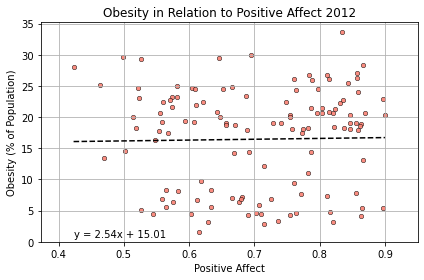

In [27]:
#Plot of year 2012

#Plotting scatter using matplotlib
plt.scatter(obhapanalysis2012["Positive_Affect"], obhapanalysis2012["Obesity"],edgecolor="black", s=20, c ="salmon", linewidth=0.5, alpha=0.90)
plt.xlabel("Positive Affect")
plt.ylabel("Obesity (% of Population)")
plt.title("Obesity in Relation to Positive Affect 2012")
plt.grid()

#creating the separate parts of a linear regression
slope, inter, r, p, std_err = linregress(obhapanalysis2012["Positive_Affect"], obhapanalysis2012["Obesity"])
print(f'The r-value is: {r}')

#creating a range for the linear regression
xrange = np.arange(obhapanalysis2012["Positive_Affect"].min(),obhapanalysis2012["Positive_Affect"].max(),.25, dtype="float")


#creating points to graph the linear regression
fit = slope*xrange  + inter
line = "y = " + str(round(slope,2)) + "x + " + str(round(inter,2))

#Plotting the linear regression
plt.plot((obhapanalysis2012["Positive_Affect"].min(),obhapanalysis2012["Positive_Affect"].max()),fit,"--", color="black")
plt.annotate(line,(obhapanalysis2012["Positive_Affect"].min(), obhapanalysis2012["Positive_Affect"].max()*.8),fontsize=10,color="black")
plt.xlim(obhapanalysis2012["Positive_Affect"].min()-0.05,obhapanalysis2012["Positive_Affect"].max()+0.05)
plt.tight_layout()

#Saving figure
plt.savefig("Resources/obhapanalysis2012")


The r-value is: 0.08928899227694329


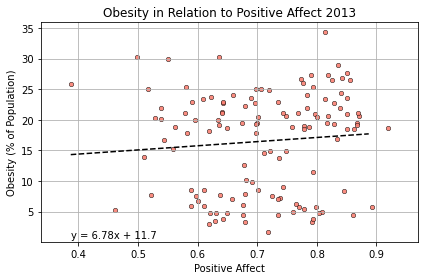

In [28]:
#Plot of year 2013

#Plotting scatter using matplotlib
plt.scatter(obhapanalysis2013["Positive_Affect"], obhapanalysis2013["Obesity"],edgecolor="black", s=20, c ="salmon", linewidth=0.5, alpha=0.90)
plt.xlabel("Positive Affect")
plt.ylabel("Obesity (% of Population)")
plt.title("Obesity in Relation to Positive Affect 2013")
plt.grid()

#creating the separate parts of a linear regression
slope, inter, r, p, std_err = linregress(obhapanalysis2013["Positive_Affect"], obhapanalysis2013["Obesity"])
print(f'The r-value is: {r}')

#creating a range for the linear regression
xrange = np.arange(obhapanalysis2013["Positive_Affect"].min(),obhapanalysis2013["Positive_Affect"].max(),.25, dtype="float")


#creating points to graph the linear regression
fit = slope*xrange  + inter
line = "y = " + str(round(slope,2)) + "x + " + str(round(inter,2))

#Plotting the linear regression
plt.plot(xrange,fit,"--", color="black")
plt.annotate(line,(obhapanalysis2013["Positive_Affect"].min(), obhapanalysis2013["Positive_Affect"].max()*.8),fontsize=10,color="black")
plt.xlim(obhapanalysis2013["Positive_Affect"].min()-0.05,obhapanalysis2013["Positive_Affect"].max()+0.05)
plt.tight_layout()

#Saving figure
plt.savefig("Resources/obhapanalysis2013")


The r-value is: 0.13472418929968166


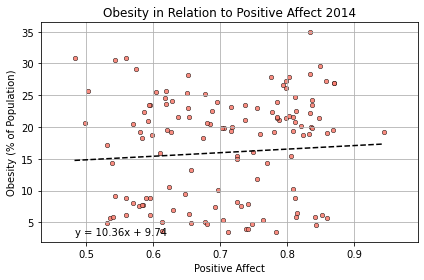

In [29]:
#Plot of year 2014

#Plotting scatter using matplotlib
plt.scatter(obhapanalysis2014["Positive_Affect"], obhapanalysis2014["Obesity"],edgecolor="black", s=20, c ="salmon", linewidth=0.5, alpha=0.90)
plt.xlabel("Positive Affect")
plt.ylabel("Obesity (% of Population)")
plt.title("Obesity in Relation to Positive Affect 2014")
plt.grid()

#creating the separate parts of a linear regression
slope, inter, r, p, std_err = linregress(obhapanalysis2014["Positive_Affect"], obhapanalysis2014["Obesity"])
print(f'The r-value is: {r}')

#creating a range for the linear regression
xrange = np.arange(obhapanalysis2014["Positive_Affect"].min(),obhapanalysis2014["Positive_Affect"].max(),.25, dtype="float")


#creating points to graph the linear regression
fit = slope*xrange  + inter
line = "y = " + str(round(slope,2)) + "x + " + str(round(inter,2))

#Plotting the linear regression
plt.plot((obhapanalysis2014["Positive_Affect"].min(),obhapanalysis2014["Positive_Affect"].max()),fit,"--", color="black")
plt.annotate(line,(obhapanalysis2014["Positive_Affect"].min(), obhapanalysis2014["Positive_Affect"].max()+2),fontsize=10,color="black")
plt.xlim(obhapanalysis2014["Positive_Affect"].min()-0.05,obhapanalysis2014["Positive_Affect"].max()+0.05)
plt.tight_layout()

#Saving figure
plt.savefig("Resources/obhapanalysis2014")


The r-value is: 0.08638399161604361


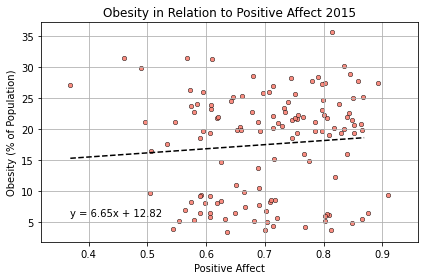

In [30]:
#Plot of year 2015

#Plotting scatter using matplotlib
plt.scatter(obhapanalysis2015["Positive_Affect"], obhapanalysis2015["Obesity"],edgecolor="black", s=20, c ="salmon", linewidth=0.5, alpha=0.90)
plt.xlabel("Positive Affect")
plt.ylabel("Obesity (% of Population)")
plt.title("Obesity in Relation to Positive Affect 2015")
plt.grid()

#creating the separate parts of a linear regression
slope, inter, r, p, std_err = linregress(obhapanalysis2015["Positive_Affect"], obhapanalysis2015["Obesity"])
print(f'The r-value is: {r}')

#creating a range for the linear regression
xrange = np.arange(obhapanalysis2015["Positive_Affect"].min(),obhapanalysis2015["Positive_Affect"].max(),.25, dtype="float")


#creating points to graph the linear regression
fit = slope*xrange  + inter
line = "y = " + str(round(slope,2)) + "x + " + str(round(inter,2))

#Plotting the linear regression
plt.plot(xrange,fit,"--", color="black")
plt.annotate(line,(obhapanalysis2015["Positive_Affect"].min(), obhapanalysis2015["Positive_Affect"].max()+5),fontsize=10,color="black")
plt.xlim(obhapanalysis2015["Positive_Affect"].min()-0.05,obhapanalysis2015["Positive_Affect"].max()+0.05)
plt.tight_layout()

#Saving figure
plt.savefig("Resources/obhapanalysis2015")


The r-value is: 0.12030504402049243


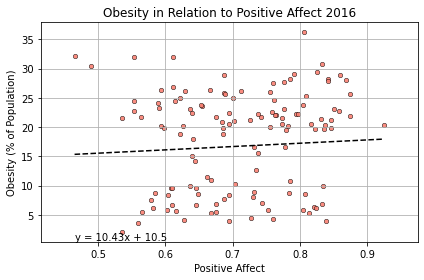

In [31]:
#Plot of year 2016

#Plotting scatter using matplotlib
plt.scatter(obhapanalysis2016["Positive_Affect"], obhapanalysis2016["Obesity"],edgecolor="black", s=20, c ="salmon", linewidth=0.5, alpha=0.90)
plt.xlabel("Positive Affect")
plt.ylabel("Obesity (% of Population)")
plt.title("Obesity in Relation to Positive Affect 2016")
plt.grid()

#creating the separate parts of a linear regression
slope, inter, r, p, std_err = linregress(obhapanalysis2016["Positive_Affect"], obhapanalysis2016["Obesity"])
print(f'The r-value is: {r}')

#creating a range for the linear regression
xrange = np.arange(obhapanalysis2016["Positive_Affect"].min(),obhapanalysis2016["Positive_Affect"].max(),.25, dtype="float")


#creating points to graph the linear regression
fit = slope*xrange  + inter
line = "y = " + str(round(slope,2)) + "x + " + str(round(inter,2))

#Plotting the linear regression
plt.plot((obhapanalysis2016["Positive_Affect"].min(),obhapanalysis2016["Positive_Affect"].max()),fit,"--", color="black")
plt.annotate(line,(obhapanalysis2016["Positive_Affect"].min(), obhapanalysis2016["Positive_Affect"].max()*.8),fontsize=10,color="black")
plt.xlim(obhapanalysis2016["Positive_Affect"].min()-0.05,obhapanalysis2016["Positive_Affect"].max()+0.05)
plt.tight_layout()

#Saving figure
plt.savefig("Resources/obhapanalysis2016")


# Conclusion

There does not seem to be a strong correlation between "Positive Affect" from the Happiness Dataset and the Obesity % of Obesity Dataset. But there is a slight positive correlation between all the years where the higher the positive affect the higher obesity level.